# Import Libraries

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re
from nltk.tokenize import word_tokenize ,sent_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

# Data Load and Preprocessing:
- dataset link : https://www.kaggle.com/datasets/tboyle10/medicaltranscriptions

In [6]:
df=pd.read_csv("mtsamples.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [10]:
df=df[df["transcription"].notna()]
df

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [24]:
data_categories=df.groupby(df["medical_specialty"])
data_categories.groups

{' Allergy / Immunology': [0, 4993, 4994, 4995, 4996, 4997, 4998], ' Autopsy': [4981, 4983, 4986, 4987, 4988, 4990, 4991, 4992], ' Bariatrics': [1, 2, 5, 6, 8, 10, 13, 15, 17, 21, 4977, 4978, 4979, 4980, 4982, 4984, 4985, 4989], ' Cardiovascular / Pulmonary': [3, 4, 7, 9, 11, 16, 4609, 4611, 4612, 4613, 4614, 4616, 4617, 4618, 4619, 4620, 4621, 4622, 4623, 4624, 4625, 4626, 4627, 4628, 4629, 4630, 4631, 4632, 4633, 4634, 4635, 4636, 4637, 4638, 4639, 4640, 4641, 4642, 4643, 4644, 4645, 4646, 4647, 4648, 4650, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4665, 4666, 4667, 4668, 4669, 4670, 4671, 4672, 4673, 4674, 4675, 4676, 4677, 4678, 4679, 4680, 4681, 4682, 4683, 4684, 4685, 4686, 4687, 4688, 4689, 4690, 4691, 4692, 4693, 4694, 4695, 4696, 4697, 4698, 4699, 4700, 4701, 4702, 4703, 4704, 4705, ...], ' Chiropractic': [4596, 4597, 4598, 4599, 4600, 4601, 4603, 4604, 4605, 4606, 4607, 4608, 4610, 4615], ' Consult - History and Phy.': [4081, 4082, 40

In [25]:
len(data_categories.groups)

40

In [26]:
c=1
for cat_name,data_category in data_categories:
    print(f"{cat_name}  -- {len(data_category)}")
    c=c+1

 Allergy / Immunology  -- 7
 Autopsy  -- 8
 Bariatrics  -- 18
 Cardiovascular / Pulmonary  -- 371
 Chiropractic  -- 14
 Consult - History and Phy.  -- 516
 Cosmetic / Plastic Surgery  -- 27
 Dentistry  -- 27
 Dermatology  -- 29
 Diets and Nutritions  -- 10
 Discharge Summary  -- 108
 ENT - Otolaryngology  -- 96
 Emergency Room Reports  -- 75
 Endocrinology  -- 19
 Gastroenterology  -- 224
 General Medicine  -- 259
 Hematology - Oncology  -- 90
 Hospice - Palliative Care  -- 6
 IME-QME-Work Comp etc.  -- 16
 Lab Medicine - Pathology  -- 8
 Letters  -- 23
 Nephrology  -- 81
 Neurology  -- 223
 Neurosurgery  -- 94
 Obstetrics / Gynecology  -- 155
 Office Notes  -- 50
 Ophthalmology  -- 83
 Orthopedic  -- 355
 Pain Management  -- 61
 Pediatrics - Neonatal  -- 70
 Physical Medicine - Rehab  -- 21
 Podiatry  -- 47
 Psychiatry / Psychology  -- 53
 Radiology  -- 273
 Rheumatology  -- 10
 SOAP / Chart / Progress Notes  -- 166
 Sleep Medicine  -- 20
 Speech - Language  -- 9
 Surgery  -- 1088
 Ur

In [30]:
filtered_data_categories=data_categories.filter(lambda x : x.shape[0]>50)
final_data_categories=filtered_data_categories.groupby(df["medical_specialty"])
len(final_data_categories)

21

In [33]:
# Boş bir liste oluştur
category_list = []

# Grupları dolaşarak listeye ekle
for cat_name, data_category in final_data_categories:
    category_list.append({"Category": cat_name, "Count": len(data_category)})

# Listeyi bir DataFrame'e çevir
category_df = pd.DataFrame(category_list)
category_df

,Category,Count
0,Cardiovascular / Pulmonary,371
1,Consult - History and Phy.,516
2,Discharge Summary,108
3,ENT - Otolaryngology,96
4,Emergency Room Reports,75
5,Gastroenterology,224
6,General Medicine,259
7,Hematology - Oncology,90
8,Nephrology,81
9,Neurology,223


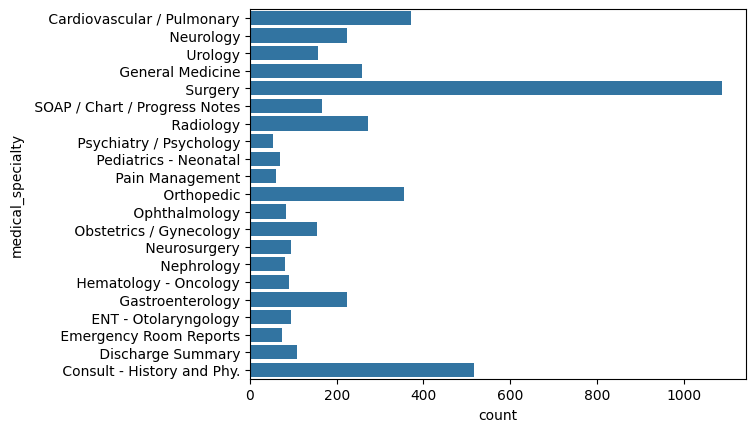

In [34]:
plt.figure()
sns.countplot(y="medical_specialty",data=filtered_data_categories)
plt.show()

In [35]:
data=filtered_data_categories[["transcription","medical_specialty"]]
data

,transcription,medical_specialty
3,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary
4,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary
7,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary
9,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary
11,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary
...,...,...
4972,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary
4973,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...",Cardiovascular / Pulmonary
4974,"HISTORY OF PRESENT ILLNESS: , The patient is a...",Cardiovascular / Pulmonary
4975,"HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-...",Cardiovascular / Pulmonary


#  NLP : Text Cleaning: low char, lemmatization 

In [36]:
def clean_text(text):
    text=text.translate(str.maketrans("","",string.punctuation)) # noktalamayı kaldırır
    text1="".join([w for w in text if not w.isdigit()])
    replace_by_space=re.compile('[/(){}\[\]\|@,;]')
    text2=text1.lower()
    text2=replace_by_space.sub("",text2)

    return text2

def lemmatize_text(text):
    wordlist=[]
    lemmatizer=WordNetLemmatizer()

    sentences=sent_tokenize(text)

    inital_sentence=sentences[0:1]
    final_sentence=sentences[len(sentences)-2:len(sentences)-1]

    for sentence in inital_sentence:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
            
    for sentence in final_sentence:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    
    return " ".join(wordlist)


In [38]:
df["transcription2"]=df["transcription"].apply(lemmatize_text)
df["transcription2"]=df["transcription2"].apply(clean_text)
df

,description,medical_specialty,sample_name,transcription,keywords,transcription2
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",subjective this yearold white female present...
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",past medical history he ha difficulty climbi...
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",history of present illness i have seen abc t...
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",d mmode mild mitral and tricuspid regurgit...
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",there is a color doppler suggestive of a pat...
...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN,history i had the pleasure of meeting and ev...
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun...",admitting diagnosis kawasaki disease discha...
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN,subjective this is a yearold white female wh...
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN,chief complaint this yearold male present to...


In [ ]:
data["transcription"]=df["transcription2"]
data

,transcription,medical_specialty
3,d mmode mild mitral and tricuspid regurgit...,Cardiovascular / Pulmonary
4,there is a color doppler suggestive of a pat...,Cardiovascular / Pulmonary
7,d echocardiogram multiple view of the heart a...,Cardiovascular / Pulmonary
9,description normal lv systolic function,Cardiovascular / Pulmonary
11,d study moderate biatrial enlargement,Cardiovascular / Pulmonary
...,...,...
4972,indication chest pain type of test adenos...,Cardiovascular / Pulmonary
4973,chief complaint chest pain history of prese...,Cardiovascular / Pulmonary
4974,history of present illness the patient is a ...,Cardiovascular / Pulmonary
4975,history of present illness mr abc is a yearo...,Cardiovascular / Pulmonary


# Text Featuring Eng (TF-IDF)

In [43]:
vectorizer=TfidfVectorizer(stop_words="english",max_features=1000)

tfidf=vectorizer.fit_transform(data["transcription"].tolist())
feature_names=sorted(vectorizer.get_feature_names_out())
feature_names

['abc',
 'abcd',
 'abdomen',
 'abdominal',
 'abnormal',
 'abnormality',
 'abscess',
 'access',
 'accident',
 'active',
 'activity',
 'acute',
 'addition',
 'additional',
 'adenocarcinoma',
 'adenoid',
 'adenoma',
 'adequate',
 'administered',
 'administration',
 'admission',
 'admitted',
 'admitting',
 'advanced',
 'advised',
 'africanamerican',
 'age',
 'ago',
 'air',
 'airway',
 'alcohol',
 'alert',
 'allergies',
 'alternative',
 'anemia',
 'anesthesia',
 'anesthetic',
 'aneurysm',
 'angina',
 'angiography',
 'ankle',
 'answered',
 'anterior',
 'antibiotic',
 'anxiety',
 'aorta',
 'aortic',
 'ap',
 'apnea',
 'apparent',
 'appear',
 'appeared',
 'appendectomy',
 'appendicitis',
 'applied',
 'appointment',
 'appropriate',
 'appropriately',
 'approximately',
 'area',
 'arm',
 'artery',
 'arthritis',
 'arthroplasty',
 'asked',
 'aspect',
 'aspiration',
 'aspirin',
 'assessment',
 'associated',
 'asthma',
 'atelectasis',
 'atrial',
 'av',
 'awakened',
 'axial',
 'axis',
 'baby',
 'balloon

<Axes: >

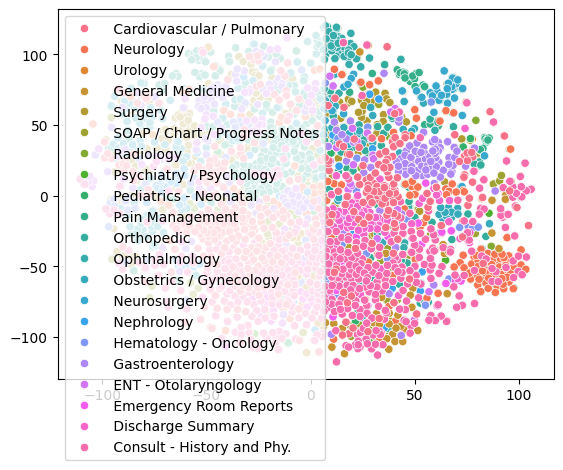

In [44]:
labels =data["medical_specialty"].tolist()

tsne=TSNE(n_components=2)
tsne_result=tsne.fit_transform(tfidf.toarray())

sns.scatterplot(x=tsne_result[:,0],y=tsne_result[:,1],hue=labels)


# Dimension Reduction (PCA)

In [45]:
pca=PCA()
tfidf_reduced=pca.fit_transform(tfidf.toarray())

labels =data["medical_specialty"].tolist()
category_list=data.medical_specialty.unique()

# Model Training and Evaluation (Logistic Regression)

<Axes: >

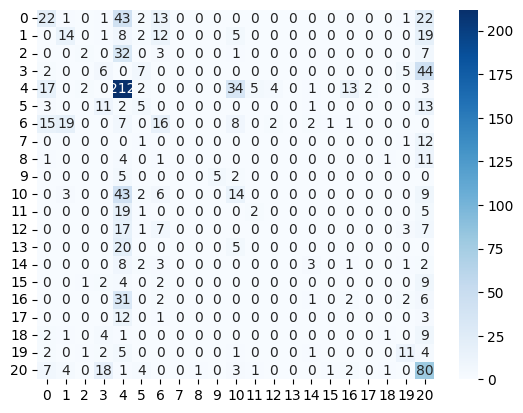

In [46]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_reduced, labels, random_state=42)

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

cm=confusion_matrix(y_test,y_pred,labels=category_list)
sns.heatmap(cm,annot=True,cmap="Blues",fmt="g")

In [48]:
print(classification_report(y_test,y_pred))

                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.31      0.21      0.25       105
    Consult - History and Phy.       0.30      0.65      0.41       123
             Discharge Summary       0.46      0.41      0.43        27
          ENT - Otolaryngology       0.00      0.00      0.00        16
        Emergency Room Reports       0.33      0.06      0.10        18
              Gastroenterology       0.11      0.05      0.06        44
              General Medicine       0.13      0.09      0.11        64
         Hematology - Oncology       0.00      0.00      0.00        18
                    Nephrology       0.33      0.15      0.21        20
                     Neurology       0.33      0.23      0.27        61
                  Neurosurgery       0.00      0.00      0.00        25
       Obstetrics / Gynecology       0.00      0.00      0.00        35
                 Ophthalmology       0.25      0.07      0.11  